In [1]:
# Import the class to read the file galaxies.hdf5
from GalformRun_basic import * 
import pandas as pd

%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})

In [7]:
def Create_data(volume=0,
                snap=37,
                zsnap=1.1734,
                feedback=True,
                input_folder='/data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/',
                output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/'):
    
    '''Function to read the output of Galform and write it in the output folder as specified'''
    #create right path
    if feedback: 
        fb = 'gp14'
        fb_save = 'feedback'
    else: 
        fb = 'gp14.nofeedback'
        fb_save= 'nofeedback'
        
    path = input_folder+fb+'/iz'+str(snap)+'/ivol'+str(volume)+'/'
    #path= '../data/uvi'+str(snap)+'_'+fb+'_vol'+str(volume)+'.txt'
    print("READ : ", path)
    #read data from galaxies.hdf5 using the class GalformRun
    G = GalformRun(path)
    u = np.array(G.get("mag_SDSS-u_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    g = np.array(G.get("mag_SDSS-g_r_tot_ext",zsnap,filename='tosedfit.hdf5'))    
    r = np.array(G.get("mag_SDSS-r_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    i = np.array(G.get("mag_SDSS-i_o_tot_ext",zsnap,filename='tosedfit.hdf5'))
    z = np.array(G.get("mag_SDSS-z_r_tot_ext",zsnap,filename='tosedfit.hdf5'))

    B = np.array(G.get("mag_B_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    V = np.array(G.get("mag_V_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    J = np.array(G.get("mag_UKIRT-J_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    H = np.array(G.get("mag_UKIRT-H_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    K = np.array(G.get("mag_UKIRT-K_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    
    NUV = np.array(G.get("mag_GALEX-NUV_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    FUV = np.array(G.get("mag_GALEX-FUV_r_tot_ext",zsnap,filename='tosedfit.hdf5'))

    
    mass = np.array(G.get("mstars_tot",zsnap,filename='tosedfit.hdf5'))
    tp = np.array(G.get("type",zsnap,filename='tosedfit.hdf5'))

    #crete pandas dataframe with data
    df = pd.DataFrame(data={'u':u , 'g':g ,'r':r , 'i':i, 'z':z , 'B':B, 'V':V, 'J':J,'H':H,'K':K,'NUV':NUV,'FUV':FUV,'stellarmass':mass, 'type':tp})
    #save dataframe in a txt file
    output_name= output_folder+'giorgio_galform_'+str(snap)+'_'+fb_save+'_vol'+str(volume)+'.txt' 
    df.to_csv(output_name ,index=None,sep=' ')
    print("WRITE: ", output_name)
    return u,g,r,i,z,B,V,J,H,K,NUV,FUV,mass,tp

In [8]:
u,g,r,i,z,B,V,J,H,K,NUV,FUV,mass,tp = Create_data(volume=0,snap=37,zsnap=1.1734,feedback=True,output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/')

READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol0/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol0.txt


(array([9.7000e+01, 9.6300e+02, 3.6920e+03, 5.8810e+03, 3.7480e+03,
        3.5440e+03, 7.3740e+03, 9.2220e+03, 1.3789e+04, 2.1524e+04,
        2.9703e+04, 3.7091e+04, 4.0521e+04, 4.1237e+04, 3.8719e+04,
        3.3706e+04, 2.7978e+04, 2.2277e+04, 1.6273e+04, 1.2643e+04,
        1.0189e+04, 8.4920e+03, 6.8920e+03, 4.8960e+03, 3.5870e+03,
        3.0200e+03, 2.6860e+03, 1.7130e+03, 2.4200e+02, 1.5000e+01]),
 array([ 4.64305925,  4.86629256,  5.08952586,  5.31275916,  5.53599246,
         5.75922577,  5.98245907,  6.20569237,  6.42892567,  6.65215898,
         6.87539228,  7.09862558,  7.32185888,  7.54509219,  7.76832549,
         7.99155879,  8.21479209,  8.4380254 ,  8.6612587 ,  8.884492  ,
         9.1077253 ,  9.3309586 ,  9.55419191,  9.77742521, 10.00065851,
        10.22389181, 10.44712512, 10.67035842, 10.89359172, 11.11682502,
        11.34005833]),
 <a list of 30 Patch objects>)

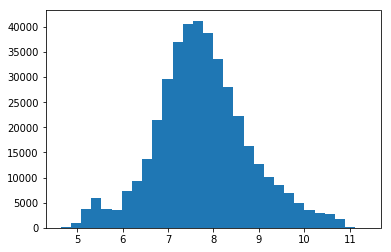

In [27]:
plt.hist(np.log10(mass),bins=30)

# Create data

In [9]:
for v in range(0,64):
    Create_data(volume=v,snap=37,zsnap=1.1734,feedback=True,output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/')

READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol0/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol0.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol1/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol1.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol2/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol2.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol3/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol3.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol4/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol4.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol5/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol5.txt
READ :  /data/de

WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol49.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol50/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol50.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol51/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol51.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol52/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol52.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol53/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol53.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol54/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_37_feedback_vol54.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz37/ivol55/
WRIT

# Add subvolumes

In [11]:
def Add_subvolumes(snap=37,feedback=True,N_sub_volumes=1,data_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/'):
    '''Read all the subvolumes (0 to N_sub_volumes) for the specified snapshot and for the specified AGN feedback scenario'''
    u_tot = []
    g_tot = []
    r_tot = []
    i_tot = []
    z_tot = []
    
    B_tot = []
    V_tot = []
    J_tot = []
    H_tot = []
    K_tot = []
    NUV_tot = []
    FUV_tot = []
    
    
    mass_tot = []
    type_tot = []
    for i_vol in range(N_sub_volumes):
        
        if feedback: 
            fb_save = 'feedback'
        else: 
            fb_save= 'nofeedback'
        
        data = pd.read_csv(data_folder+'giorgio_galform_'+str(snap)+'_'+fb_save+'_vol'+str(i_vol)+'.txt',delimiter=' ')
        #print(data['u'][0])

        
        u_tot = np.concatenate((u_tot,data['u']))
        g_tot = np.concatenate((g_tot,data['g']))
        r_tot = np.concatenate((r_tot,data['r']))
        i_tot = np.concatenate((i_tot,data['i']))
        z_tot = np.concatenate((z_tot,data['z']))
        
        B_tot = np.concatenate((B_tot,data['B']))
        V_tot = np.concatenate((V_tot,data['V']))
        J_tot = np.concatenate((J_tot,data['J']))
        H_tot = np.concatenate((H_tot,data['H']))
        K_tot = np.concatenate((K_tot,data['K']))
        NUV_tot = np.concatenate((NUV_tot,data['NUV']))
        FUV_tot = np.concatenate((FUV_tot,data['FUV']))

        mass_tot = np.concatenate((mass_tot,data['stellarmass']))
        type_tot = np.concatenate((type_tot,data['type']))

        #if i_vol ==N_sub_volumes-1:
        #    print(len(u_tot))
        print(len(u_tot))
        
        
    return u_tot,g_tot,r_tot,i_tot,z_tot,B_tot,V_tot,J_tot,H_tot,K_tot,NUV_tot,FUV_tot,mass_tot, type_tot

In [12]:
u37_feed,\
g37_feed,\
r37_feed,\
i37_feed,\
z37_feed,\
B37_feed,\
V37_feed,\
J37_feed,\
H37_feed,\
K37_feed,\
NUV37_feed,\
FUV37_feed,\
mass37_feed,\
type37_feed    = Add_subvolumes(snap=37,feedback=True,N_sub_volumes=64)


411714
833680
1246479
1664890
2091306
2498490
2925176
3344178
3756543
4166102
4589522
5000707
5428061
5860265
6279062
6685809
7099393
7528276
7959956
8382144
8795579
9215682
9626302
10042631
10470649
10876019
11297447
11722726
12154972
12585959
12996504
13415696
13837471
14261790
14670919
15089562
15516536
15949081
16364952
16789878
17205826
17625973
18048570
18460587
18892825
19315860
19741617
20170401
20590939
21007163
21417396
21847129
22264117
22682719
23098431
23537977
23956280
24389841
24807314
25222109
25639764
26060865
26470313
26895387


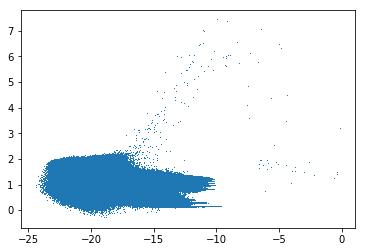

In [13]:
plt.plot(V37_feed,u37_feed-V37_feed,",")
plt.show()

# COSMOLOGY

In [14]:
def integ_trap(func,z1,z2,N=1000):
    z = np.logspace(np.log10(z1),np.log10(z2),N)
    y = func(z)

    A = 0
    for i in range(len(z)-1):
        A += np.abs((z[i+1]-z[i]))*(y[i]+y[i+1])/2
    return A

def E(z,Om_rad=8.4*10**(-5),Om_lambda=0.7,Om_mat=0.3):
    return np.sqrt(Om_rad*(1+z)**4 + Om_mat*(1+z)**3 + Om_lambda)

def over_E(z):
    return E(z)**(-1)

def comoving_distance(z):
    zero = 10**(-20)
    c = 3e5 #km/s
    H0=100. #km/s/Mpc
    return (c*H0**(-1)*integ_trap(over_E,zero,z,10**(3))) #Mpc h^-1

vec_r = np.vectorize(comoving_distance)

def Luminosity_distance(z):
    '''Returns the Luminosity distance in units of Mpc h^-1'''
    return comoving_distance(z)*(1.+z)

def ABSOLUTE_MAGNITUDE_minus5logh(m,z,K_correction=False,ratio_L=1.):
    if K_correction:
        return m -25. -5.*np.log10(Luminosity_distance(z)) -2.5*np.log10(ratio_L*(1.+z))
    else:
        return m -25. -5.*np.log10(Luminosity_distance(z))

vec_ABSOLUTE_MAGNITUDE_minus5logh = np.vectorize(ABSOLUTE_MAGNITUDE_minus5logh)

In [15]:
ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=1.1734)

-21.256565734819656

In [16]:
sel_i_22_5 = np.where(i37_feed<=ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=1.1734))
len(sel_i_22_5[0])

5987

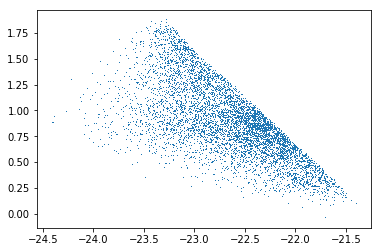

In [17]:
plt.plot(V37_feed[sel_i_22_5],u37_feed[sel_i_22_5]-V37_feed[sel_i_22_5],",")
plt.show()

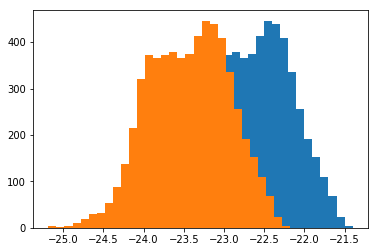

In [18]:
plt.hist(V37_feed[sel_i_22_5],bins=30)
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30)
plt.show()

In [19]:
df37_225 = pd.DataFrame(data={'u':u37_feed[sel_i_22_5], 
                        'g':g37_feed[sel_i_22_5],
                        'r':r37_feed[sel_i_22_5], 
                        'i':i37_feed[sel_i_22_5], 
                        'z':z37_feed[sel_i_22_5], 
                        'B':B37_feed[sel_i_22_5], 
                        'V':V37_feed[sel_i_22_5], 
                        'J':J37_feed[sel_i_22_5],
                        'H':H37_feed[sel_i_22_5],
                        'K':K37_feed[sel_i_22_5],
                        'NUV':NUV37_feed[sel_i_22_5],
                        'FUV':FUV37_feed[sel_i_22_5],
                        'stellarmass':mass37_feed[sel_i_22_5], 
                        'type':type37_feed[sel_i_22_5] })

In [20]:
df37_225.to_csv('/data/dega2/dc-manz2/Galform_Out/GOSIA/snap_37_i225_feed.txt' ,index=None,sep=' ')

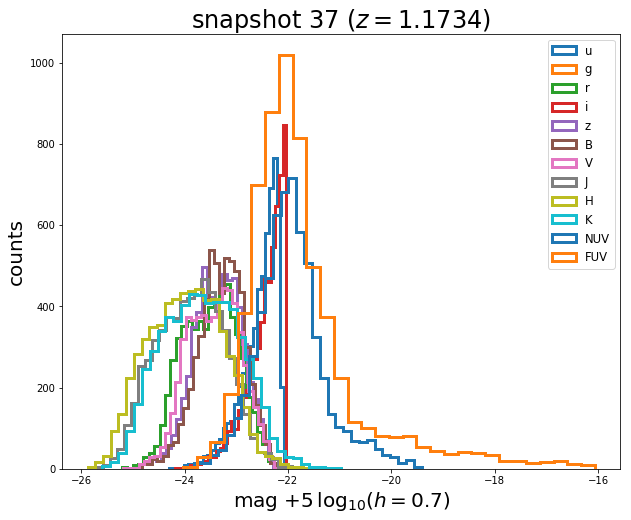

In [32]:
plt.figure(figsize=(10,8))
plt.hist(u37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='u')
plt.hist(g37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='g')
plt.hist(r37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='r')
plt.hist(i37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='i')
plt.hist(g37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='z')
plt.hist(B37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='B')
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='V')
plt.hist(J37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='J')
plt.hist(H37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='H')
plt.hist(K37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='K')
plt.hist(NUV37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='NUV')
plt.hist(FUV37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='FUV')
plt.legend(fontsize='xx-small')
plt.xlabel(r'mag $+ 5 \, \log_{10}(h = 0.7)$')
plt.ylabel('counts')
plt.title(r'snapshot 37 ($z=1.1734$)')
plt.savefig('./plots/gosia_magnitudes_snap37_feed.png')
plt.show()

(-30.0, 0.0)

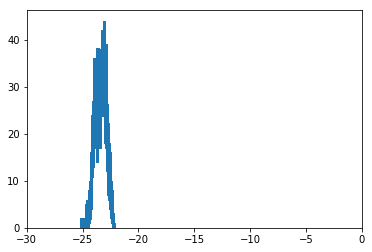

In [62]:
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=400,histtype='step',lw=3,label='V')
plt.xlim(-30.,0.)